In [1]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
from datetime import timedelta
import re
from textblob import TextBlob 

In [66]:
url = 'https://min-api.cryptocompare.com/data/histoday?fsym=moedaAlvo&tsym=BRL&limit=10&aggregate=1&toTs=1538881200000'

moedas = ['ETH', 'DASH']
dados = []
cont = 0
for moeda in moedas:
    print(moeda)
    url = url.replace('moedaAlvo', moeda)
    j = requests.get(url).json()
    for resultado in j['Data']:
        dados.append([
            resultado['time'],
            cont,
            moeda,
            resultado['open'],
            resultado['close'],
            resultado['high'],
            resultado['low'],
            resultado['volumefrom'],
            resultado['volumeto'],
        ])
    url = url.replace(moeda, 'moedaAlvo')
    cont += 1
        
df = pd.DataFrame(dados, columns=['data', 'id','moeda','abertura', 'fechamento', 'alta', 'baixa', 'vol_com', 'vol_to'])
df['dataFormat'] = df['data'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
print(df.shape)
df.head()


ETH
DASH
(22, 10)


,data,id,moeda,abertura,fechamento,alta,baixa,vol_com,vol_to,dataFormat
0,1541376000,0,ETH,789.95,786.57,791.40,778.60,1055466.14,8.301980e+08,2018-11-05
1,1541462400,0,ETH,788.26,819.24,820.21,784.87,1214482.69,9.949528e+08,2018-11-06
2,1541548800,0,ETH,837.45,823.84,841.90,821.62,1358813.93,1.119445e+09,2018-11-07
3,1541635200,0,ETH,814.22,802.97,818.62,802.48,1108888.00,8.904038e+08,2018-11-08
4,1541721600,0,ETH,794.40,794.64,800.69,790.05,952706.25,7.570585e+08,2018-11-09


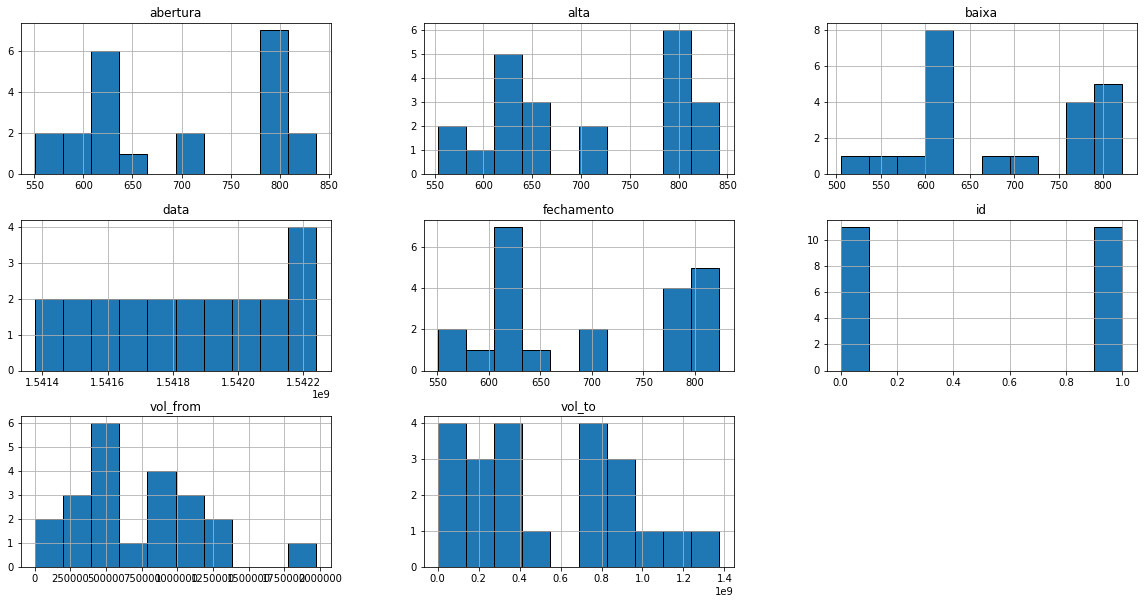

In [53]:
df_h = df[df.id == 1]
df.hist(edgecolor='black', figsize=(20, 10), grid=True);

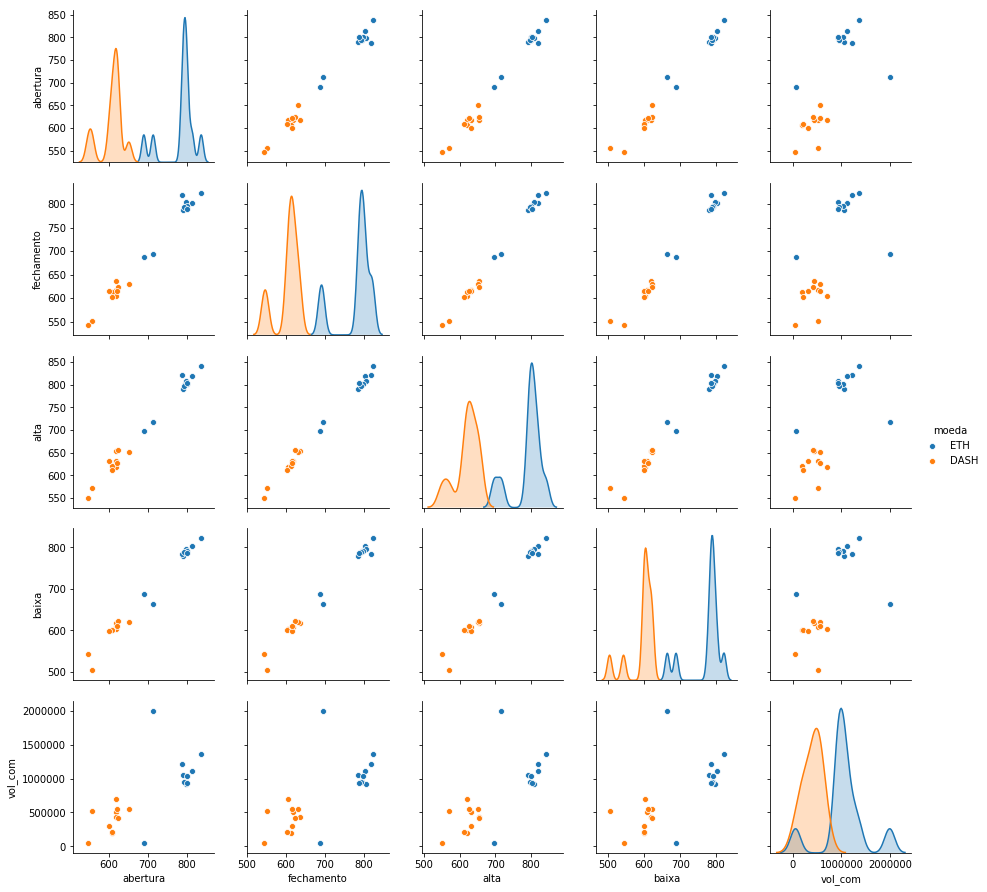

In [69]:
sns.pairplot(df.drop((['id','data', 'vol_to']), axis=1), hue="moeda")

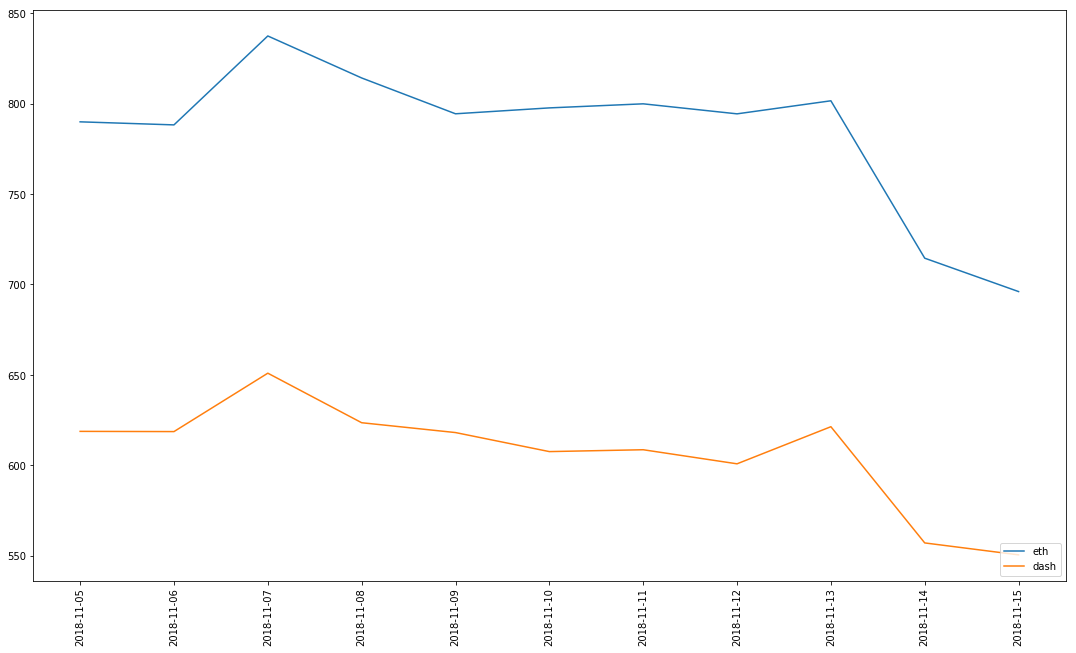

In [59]:
#df['id'].plot(kind='bar', title='Total de filmes para cada Genero', figsize=(30, 30))

x = df[(df.id == 0)]['abertura']
a = df[(df.id == 1)]['abertura']

y = np.unique(df['dataFormat'])
#y = [datetime.strptime(d,'%Y-%m-%d %H:%M:%S').date() for d in dates]



fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
line1, = ax.plot(y, x, label='eth' )
line2, = ax.plot(y, a, label='dash')
ax.set_xticklabels((pd.unique(df['dataFormat'])), rotation='vertical')
ax.legend(loc='lower right')

plt.show()
#line1, = ax.plot(df[(df.id == 0)]['abertura'], df[(df.id == 1)]['abertura'], '--', linewidth=2, label='Dashes set retroactively')

In [57]:
print(df['vol_from'])

0     1055466.14
1     1214482.69
2     1358813.93
3     1108888.00
4      952706.25
5      924730.08
6     1038260.41
7      949787.31
8      940932.10
9     1976648.66
10          0.00
11     511089.52
12     427179.65
13     556197.84
14     413521.15
15     701248.57
16     198338.44
17     212592.59
18     304344.54
19     553584.35
20     522561.65
21          0.00
Name: vol_from, dtype: float64


In [27]:
len(np.unique(df['dataFormat']))
divisor = len(np.unique(df['dataFormat']))

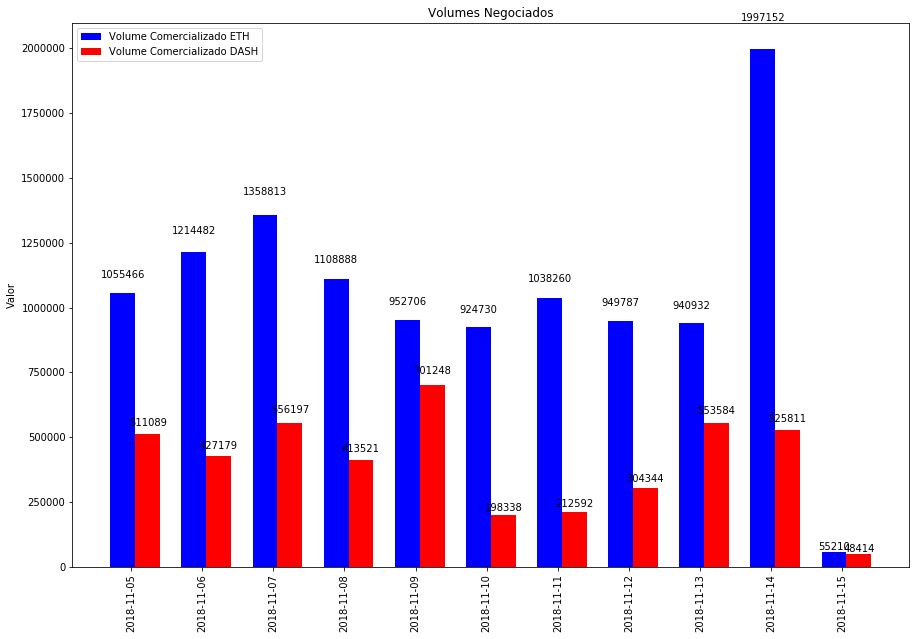

In [75]:
import numpy as np
import matplotlib.pyplot as plt

N = divisor
aberturaEth = list(df[(df.id == 0)]['vol_com'])

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

rects1 = ax.bar(ind, aberturaEth, width, color='b')

fechamentoEth = list(df[(df.id == 1)]['vol_com'])

rects2 = ax.bar(ind + width, fechamentoEth, width, color='r')


# add some text for labels, title and axes ticks
ax.set_ylabel('Valor')
ax.set_title('Volumes Negociados')
ax.set_xticks(ind + width / 3)
ax.set_xticklabels((pd.unique(df['dataFormat'])), rotation='vertical')

ax.legend((rects1[0], rects2[0]), ('Volume Comercializado ETH', 'Volume Comercializado DASH'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()


plt.show()

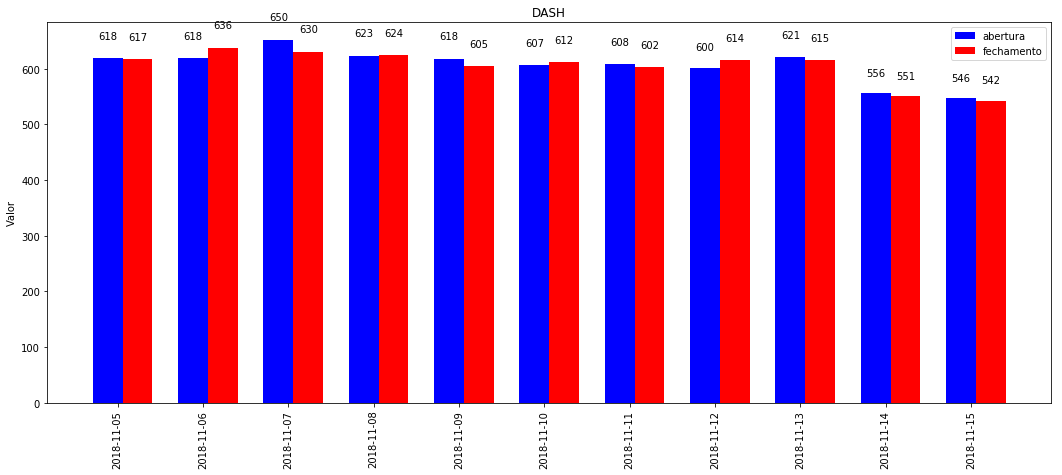

In [72]:
import numpy as np
import matplotlib.pyplot as plt

N = divisor
aberturaEth = list(df[(df.id == 1)]['abertura'])

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18, 7)

rects1 = ax.bar(ind, aberturaEth, width, color='b')

fechamentoEth = list(df[(df.id == 1)]['fechamento'])

rects2 = ax.bar(ind + width, fechamentoEth, width, color='r')


# add some text for labels, title and axes ticks
ax.set_ylabel('Valor')
ax.set_title('DASH')
ax.set_xticks(ind + width / 3)
ax.set_xticklabels((pd.unique(df['dataFormat'])), rotation='vertical')

ax.legend((rects1[0], rects2[0]), ('abertura', 'fechamento'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()


plt.show()

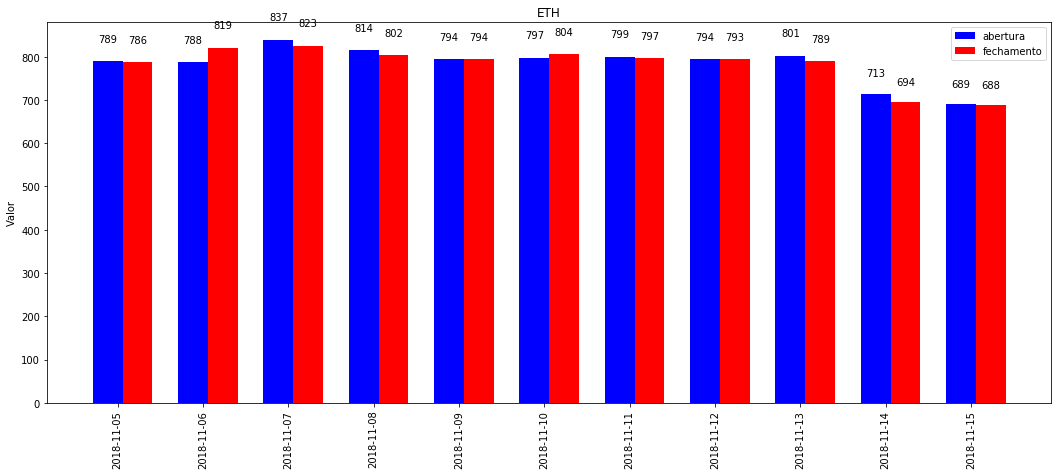

In [73]:
import numpy as np
import matplotlib.pyplot as plt

N = divisor
aberturaEth = list(df[(df.id == 0)]['abertura'])

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18, 7)

rects1 = ax.bar(ind, aberturaEth, width, color='b')

fechamentoEth = list(df[(df.id == 0)]['fechamento'])

rects2 = ax.bar(ind + width, fechamentoEth, width, color='r')


# add some text for labels, title and axes ticks
ax.set_ylabel('Valor')
ax.set_title('ETH')
ax.set_xticks(ind + width / 3)
ax.set_xticklabels((pd.unique(df['dataFormat'])), rotation='vertical')

ax.legend((rects1[0], rects2[0]), ('abertura', 'fechamento'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()


plt.show()